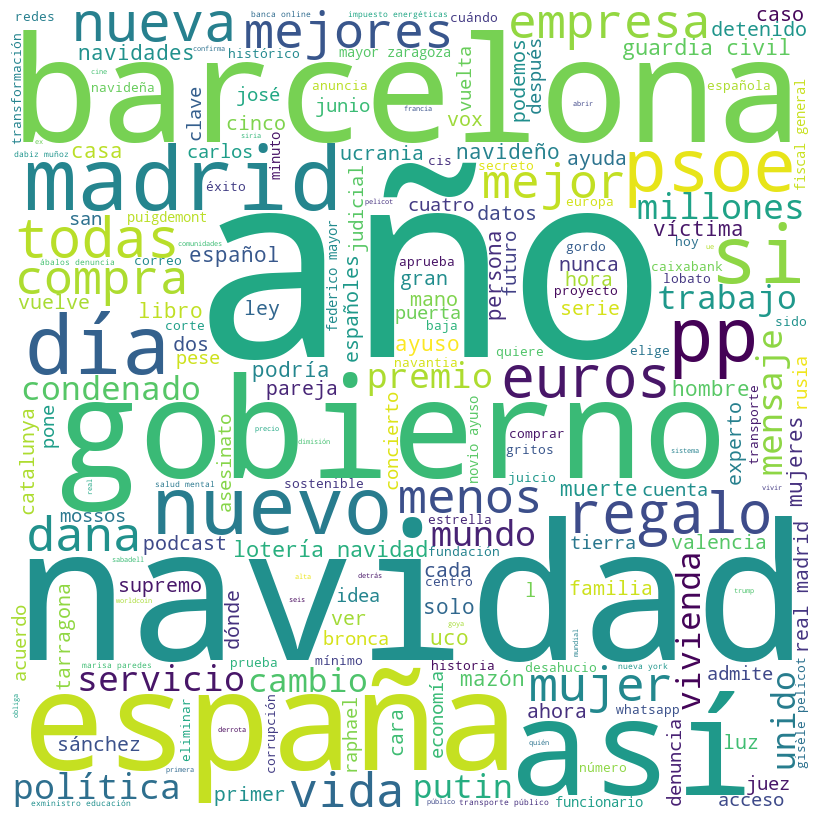

In [6]:
import json, urllib3, string, pandas as pd, matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from nltk.corpus import stopwords

text = ""

# Guardar en un archivo
with open("webs.json", "r", encoding="utf-8") as archivo:
    data = json.load(archivo)

ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
h = {"User-Agent": ua}

aux = []
http = urllib3.PoolManager()
for pagina in data["paginas"]:
    r = http.request('GET', pagina["url"], fields=None, headers=h)
    sopa = BeautifulSoup(r.data, "html.parser")

    titulares = sopa.find_all(pagina["tag"])

    for titular in titulares:
        aux.append(titular.get_text().strip())

text = " ".join(aux)

stop_words = stopwords.words('spanish') 

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", 
               "pueden", "ser", "de", "el", "en", "que", "000", "tras", "la", "de", "da"] 

stop_words[:10]

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

punctuation[:10] 

for sw in stop_words:
    text = text.lower().replace(f" {sw} "," ")
        
for p in punctuation:
    text = text.replace(p," ")
    for stop in stop_words:
        text_list = text.split()
        text_list = [i.strip() for i in text_list]
        try:
            while stop in text_list: text_list.remove(stop)
        except:
            print("Error")
            pass
        text = " ".join(text_list)
    
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=200, min_font_size=5).generate(f" {text} ")

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()